# Pollice Killing Dataset by Seaborn

# patVL1 - Assignment 1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# kill = df = pd.read_csv('./src/PoliceKillingsUS.csv')
kill = df = pd.read_csv('PoliceKillingsUS.csv', encoding='windows-1252')
kill.head(1)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False


In [7]:
pd_kills = kill.gender.value_counts()
pd_kills

M    2428
F     107
Name: gender, dtype: int64

In [8]:
type(kill.gender.value_counts())

pandas.core.series.Series

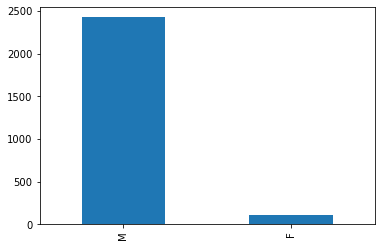

In [9]:
ax=pd_kills.plot.bar()

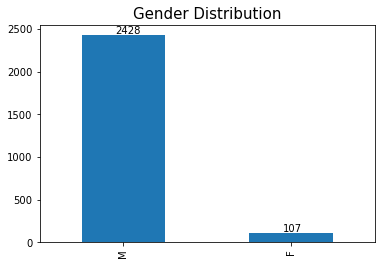

In [21]:
fig, ax = plt.subplots()
kill.gender.value_counts().plot(kind='bar', ax=ax)
ax.set_title('Gender Distribution', fontsize=15)
ax
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+.2, p.get_height()+20))

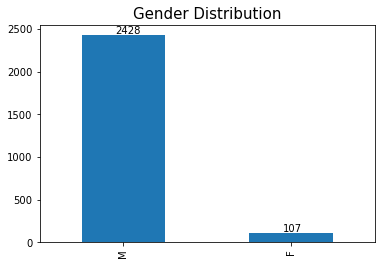

In [22]:
fig  

In [23]:
ax.patches

In [24]:
ax.patches[1]

In [25]:
ax.patches[1].get_x()

0.75

In [26]:
ax.patches[1].get_height()

107

In [27]:
kill.armed.value_counts()

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
                ... 
hand torch         1
garden tool        1
pole               1
pick-axe           1
pen                1
Name: armed, Length: 68, dtype: int64

In [28]:
kill.armed.value_counts()[:15]

gun               1398
knife              373
vehicle            177
unarmed            171
undetermined       117
toy weapon         104
machete             18
unknown weapon      18
ax                   9
Taser                9
baseball bat         8
sword                8
hammer               7
box cutter           7
metal pipe           7
Name: armed, dtype: int64

In [34]:
harmless = ['toy weapon', 'unknown weapon', 'unarmed', 'Taser', 'undetermined']
wcount = kill.armed.value_counts()
common_weapons = wcount.drop(harmless)[:7]
common_weapons[:7]

gun             1398
knife            373
vehicle          177
machete           18
ax                 9
baseball bat       8
sword              8
Name: armed, dtype: int64

[Text(0, 0, 'gun'),
 Text(1, 0, 'knife'),
 Text(2, 0, 'vehicle'),
 Text(3, 0, 'machete'),
 Text(4, 0, 'ax'),
 Text(5, 0, 'baseball bat'),
 Text(6, 0, 'sword')]

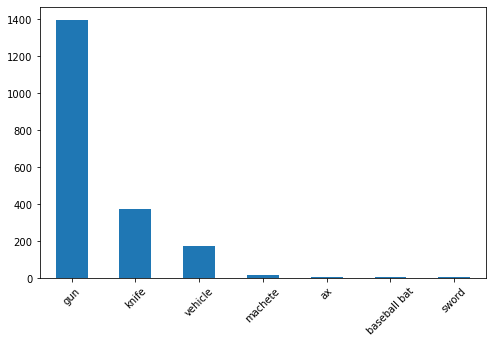

In [35]:
fig, ax = plt.subplots(figsize=(8,5))
common_weapons.plot(kind='bar', ax=ax)
ax.set_xticklabels(common_weapons.index, rotation=45)

In [36]:
a = kill['age']
a.head()

0    53.0
1    47.0
2    23.0
3    32.0
4    39.0
Name: age, dtype: float64

In [37]:
a.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
2530    False
2531     True
2532    False
2533    False
2534    False
Name: age, Length: 2535, dtype: bool

In [38]:
a.dropna().value_counts()

25.0    103
36.0     91
31.0     85
24.0     83
29.0     83
       ... 
6.0       1
14.0      1
80.0      1
12.0      1
79.0      1
Name: age, Length: 73, dtype: int64

In [51]:
a.dropna().value_counts()[:15]

25.0    103
36.0     91
31.0     85
24.0     83
29.0     83
33.0     78
32.0     75
30.0     74
35.0     74
34.0     74
28.0     73
27.0     72
26.0     72
23.0     71
37.0     66
38.0     63
45.0     62
22.0     57
18.0     54
39.0     53
41.0     52
21.0     52
50.0     47
40.0     46
53.0     42
43.0     42
19.0     41
20.0     41
46.0     41
42.0     39
49.0     38
47.0     37
51.0     36
48.0     35
59.0     35
44.0     32
52.0     31
54.0     29
56.0     28
55.0     28
17.0     23
57.0     20
58.0     18
16.0     16
63.0     16
60.0     16
62.0     13
61.0     11
64.0     11
66.0      8
15.0      8
Name: age, dtype: int64

In [52]:
kill['age_cat'] = kill.age.apply(
    lambda x: "above25" if x>=25 else ('below25' if x<25 else 'other'))

In [53]:
kill.head(1)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25


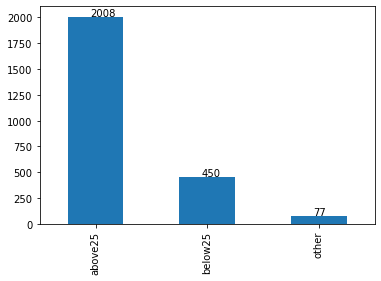

In [54]:
ax = kill['age_cat'].value_counts().plot.bar()
for p in ax.patches:
    ax.annotate(round(p.get_height()), (p.get_x()+.2, p.get_height()+10))

In [55]:
race_freq = kill.race.value_counts()

In [56]:
kill['race'].value_counts() == kill.race.value_counts()

W    True
B    True
H    True
A    True
N    True
O    True
Name: race, dtype: bool

In [57]:
race_freq 

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

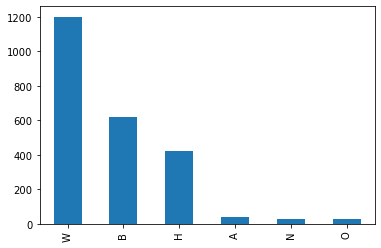

In [58]:
ax= race_freq.plot.bar()

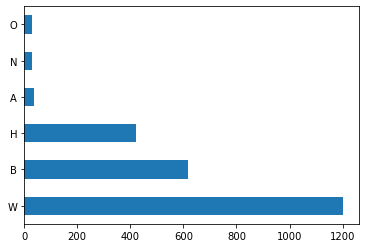

In [59]:
ax= race_freq.plot.barh()

In [61]:
race_freq.isnull()

W    False
B    False
H    False
A    False
N    False
O    False
Name: race, dtype: bool

In [62]:
race_freq.isnull().any()

False

<AxesSubplot:ylabel='race'>

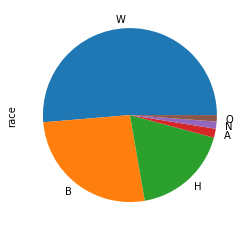

In [63]:
kill. race.value_counts().plot(kind='pie')

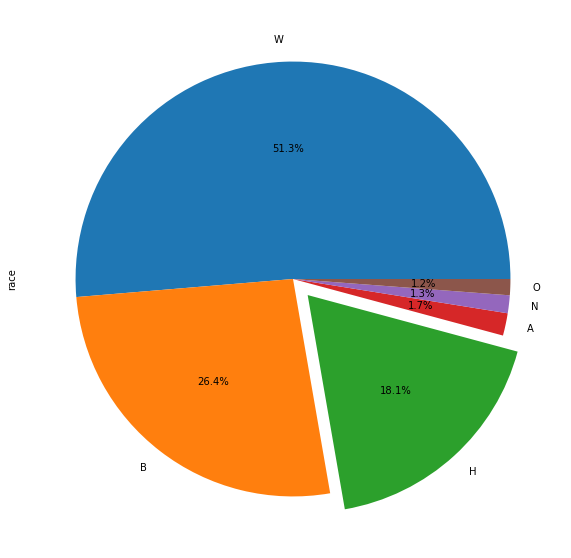

In [64]:
explode=(0,0,0.1,0,0,0)
kill. race.value_counts().plot(kind='pie', explode=explode, autopct='%.1f%%', figsize=(10,10))
sizes = kill.race.value_counts().values
labels = kill.race.value_counts().index

([<matplotlib.patches.Wedge at 0x281fd8da850>,
 [Text(-0.03328586104770358, 0.7993072322044341, 'W'),
  Text(-0.4891366809210747, -0.6330444750390882, 'B'),
  Text(0.6066936729224246, -0.6647727335231931, 'H'),
  Text(0.7822940712080317, -0.16737976625853895, 'A'),
  Text(0.7945490454892261, -0.09322990031186218, 'N'),
  Text(0.7994348126721198, -0.030066264947491702, 'O')],
 [Text(-0.02496439578577768, 0.5994804241533255, '51.3%'),
  Text(-0.366852510690806, -0.4747833562793161, '26.4%'),
  Text(0.4718728567174413, -0.5170454594069279, '18.1%'),
  Text(0.5867205534060237, -0.1255348246939042, '1.7%'),
  Text(0.5959117841169196, -0.06992242523389662, '1.3%'),
  Text(0.5995761095040898, -0.022549698710618776, '1.2%')])

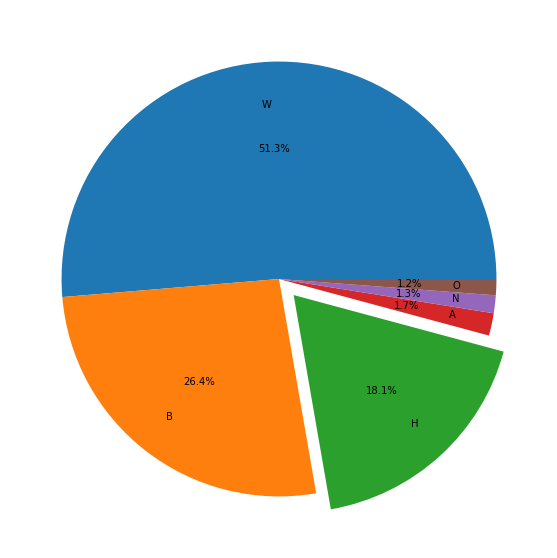

In [65]:
fig, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(x = sizes,
        explode=explode,
        labels=labels,
        labeldistance=.8,
        autopct='%.1f%%',
        startangle=0)

In [66]:
names = kill.name.value_counts()[:15]
names 

TK TK                         49
Michael Johnson                2
Brandon Jones                  2
Eric Harris                    2
Michael Brown                  2
TK Tk                          2
Daquan Antonio Westbrook       2
Francis Perry                  1
Sadiq Bishara-Abaker Idris     1
Jesse Daniel Joynt             1
Robert Lee Brown               1
Dylan Papa                     1
Jose Romero                    1
Steven Del Rio                 1
Jose Torres                    1
Name: name, dtype: int64

In [67]:
unknown = ['TK TK', 'TK Tk']
names.drop(unknown, inplace=True)
names 

Michael Johnson               2
Brandon Jones                 2
Eric Harris                   2
Michael Brown                 2
Daquan Antonio Westbrook      2
Francis Perry                 1
Sadiq Bishara-Abaker Idris    1
Jesse Daniel Joynt            1
Robert Lee Brown              1
Dylan Papa                    1
Jose Romero                   1
Steven Del Rio                1
Jose Torres                   1
Name: name, dtype: int64

# patVL2 

In [69]:
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [70]:
kill = df = pd.read_csv('PoliceKillingsUS.csv', encoding='windows-1252')
kill.head(2)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False


In [71]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [72]:
kill.describe()

,id,age
count,2535.000000,2458.000000
mean,1445.731755,36.605370
std,794.259490,13.030774
min,3.000000,6.000000
25%,768.500000,26.000000
50%,1453.000000,34.000000
75%,2126.500000,45.000000
max,2822.000000,91.000000


In [73]:
kill.describe(include='all')

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
count,2535.000000,2535,2535,2535,2526,2458.000000,2535,2340,2535,2535,2535,2535,2470,2535
unique,NaN,2481,879,2,68,NaN,2,6,1417,51,2,3,4,2
top,NaN,TK TK,24/01/17,shot,gun,NaN,M,W,Los Angeles,CA,False,attack,Not fleeing,False
freq,NaN,49,8,2363,1398,NaN,2428,1201,39,424,1902,1611,1695,2264
mean,1445.731755,NaN,NaN,NaN,NaN,36.605370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,794.259490,NaN,NaN,NaN,NaN,13.030774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.000000,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,768.500000,NaN,NaN,NaN,NaN,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1453.000000,NaN,NaN,NaN,NaN,34.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2126.500000,NaN,NaN,NaN,NaN,45.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
kill.shape

(2535, 14)

In [75]:
kill.dropna(inplace=True)

<AxesSubplot:xlabel='gender', ylabel='age'>

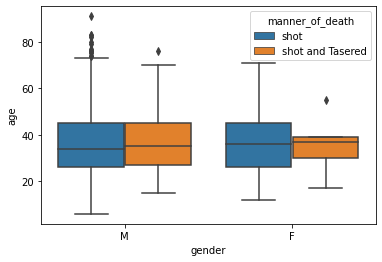

In [76]:
sns.boxplot(x='gender', y='age', data=kill, hue='manner_of_death')

<AxesSubplot:xlabel='gender', ylabel='age'>

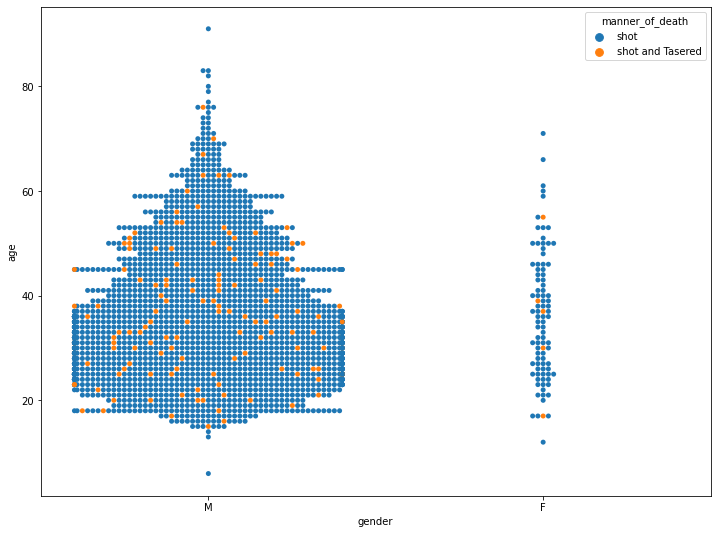

In [77]:
fig, ax = plt.subplots(figsize=(12,9))
sns.swarmplot(x='gender', y='age', data=kill, hue='manner_of_death')

In [78]:
kill.head(1)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False


In [79]:
kill.city.value_counts()

Los Angeles    35
Phoenix        28
Houston        24
Chicago        22
Austin         18
               ..
Burkesville     1
Mesquite        1
Norwood         1
Opelika         1
Oshkosh         1
Name: city, Length: 1282, dtype: int64

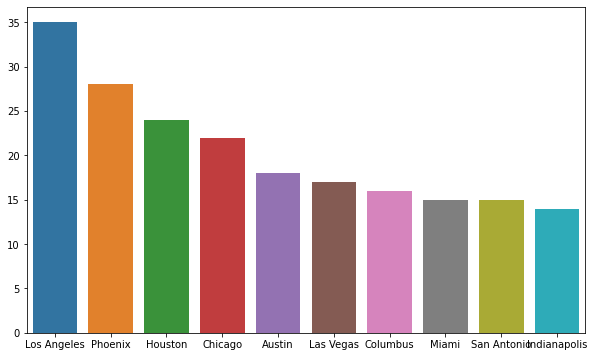

In [80]:
city_freq = kill.city.value_counts()[:10]
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x=city_freq.index, y=city_freq.values)

<AxesSubplot:xlabel='city', ylabel='count'>

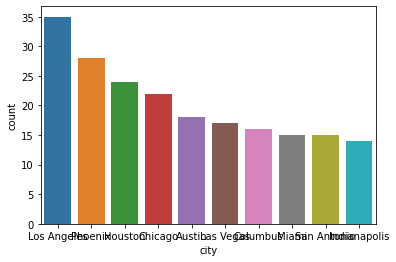

In [81]:
ax.set_xticklabels(city_freq.index,rotation=45)
ax.set_title('Duck and Cover', color='red', fontsize=12)
sns.countplot(x='city', data=kill, order=city_freq.index)

In [82]:
state_freq =  kill.state.value_counts()[:20]
state_freq

CA    366
TX    200
FL    136
AZ    105
OH     70
NC     66
OK     65
CO     63
GA     61
MO     58
TN     56
IL     56
WA     51
LA     47
AL     45
PA     45
NY     43
VA     43
WI     42
NM     41
Name: state, dtype: int64

In [83]:
kill.state.value_counts()

CA    366
TX    200
FL    136
AZ    105
OH     70
NC     66
OK     65
CO     63
GA     61
MO     58
TN     56
IL     56
WA     51
LA     47
AL     45
PA     45
NY     43
VA     43
WI     42
NM     41
SC     41
IN     40
KY     40
MD     36
MI     36
NV     34
OR     32
MN     31
NJ     30
KS     24
UT     22
MS     22
MA     22
WV     21
AR     20
AK     14
NE     14
ID     14
IA     12
MT     11
HI     11
DC     11
ME     10
SD      9
DE      8
CT      7
NH      7
WY      7
ND      4
VT      3
RI      2
Name: state, dtype: int64

In [84]:
kill.groupby('state')['state'].count().sort_values(ascending=False)[:20]

state
CA    366
TX    200
FL    136
AZ    105
OH     70
NC     66
OK     65
CO     63
GA     61
MO     58
TN     56
IL     56
WA     51
LA     47
PA     45
AL     45
VA     43
NY     43
WI     42
SC     41
Name: state, dtype: int64

<AxesSubplot:>

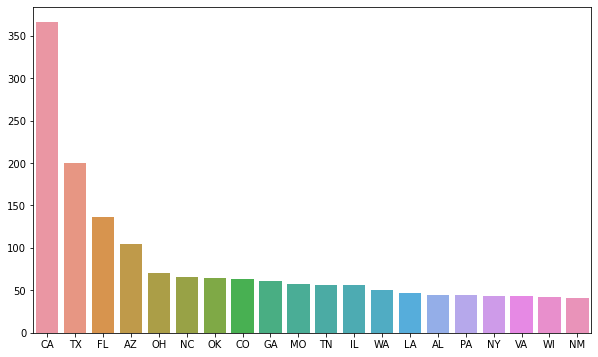

In [85]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=state_freq.index, y=state_freq.values, data= kill)

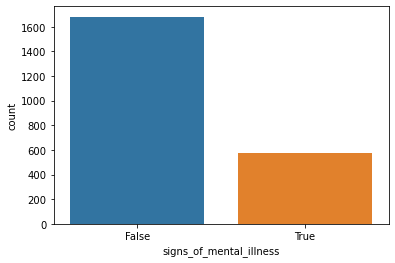

In [86]:
ax.set_title("Kills by State", color='green', fontsize=18)
sns.countplot(kill.signs_of_mental_illness)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+.1, p.get_height()+1))

<AxesSubplot:xlabel='flee', ylabel='count'>

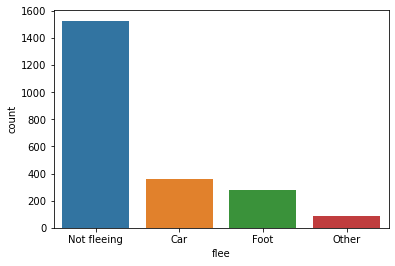

In [87]:
flee_freq = kill.flee.value_counts()
flee_freq
sns.countplot(kill.flee)

<AxesSubplot:xlabel='flee', ylabel='count'>

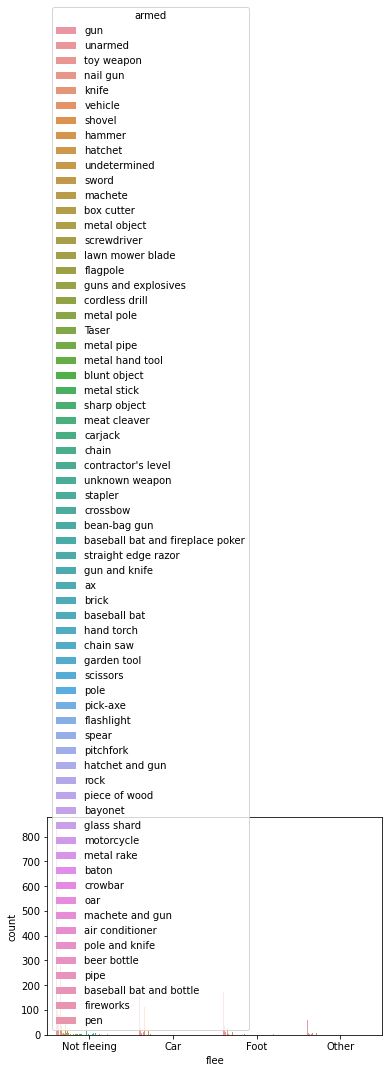

In [88]:
sns.countplot(x='flee', hue='armed', data=kill)

In [89]:
kill['unarmed'] = kill[kill['armed']=='unarmed']['armed']  # ???
kill.head(1)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,unarmed
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,NaN


In [90]:
ff = kill.flee.value_counts()
ff 

Not fleeing    1528
Car             360
Foot            278
Other            88
Name: flee, dtype: int64

<AxesSubplot:xlabel='threat_level', ylabel='count'>

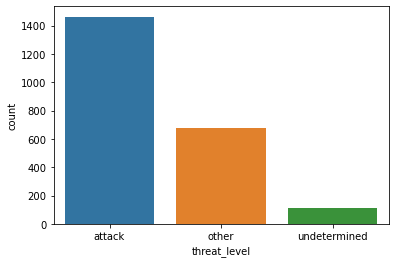

In [91]:
threats_freq = kill.threat_level.value_counts()
threats_freq 
sns.countplot(x='threat_level', data=kill)